<h2> Lab 7

In [2]:
import warnings
warnings.filterwarnings("ignore")
#Basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Basic sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
#Keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, LSTM, GRU, Bidirectional, Input
from keras.layers import RepeatVector, TimeDistributed
from keras.optimizers import Adam, RMSprop
from keras.regularizers import L1L2
from keras.callbacks import ModelCheckpoint
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
#encode elements and colors into integers for plotting/analysis
elements={0:'Ag', 1:'In', 2:'U', 3:'W'}
colors={0:'b', 1:'g', 2:'r', 3:'m'}
num_classes=len(elements)
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15481157018289313582
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 15502344192
locality {
  bus_id: 4
  numa_node: 3
  links {
  }
}
incarnation: 16838200625787494947
physical_device_desc: "device: 0, name: Tesla V100-PCIE-16GB, pci bus id: 0000:d8:00.0, compute capability: 7.0"
xla_global_id: 416903419
]


2024-10-18 12:10:00.592560: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /device:GPU:0 with 14784 MB memory:  -> device: 0, name: Tesla V100-PCIE-16GB, pci bus id: 0000:d8:00.0, compute capability: 7.0


<h3> Exercise Set 1

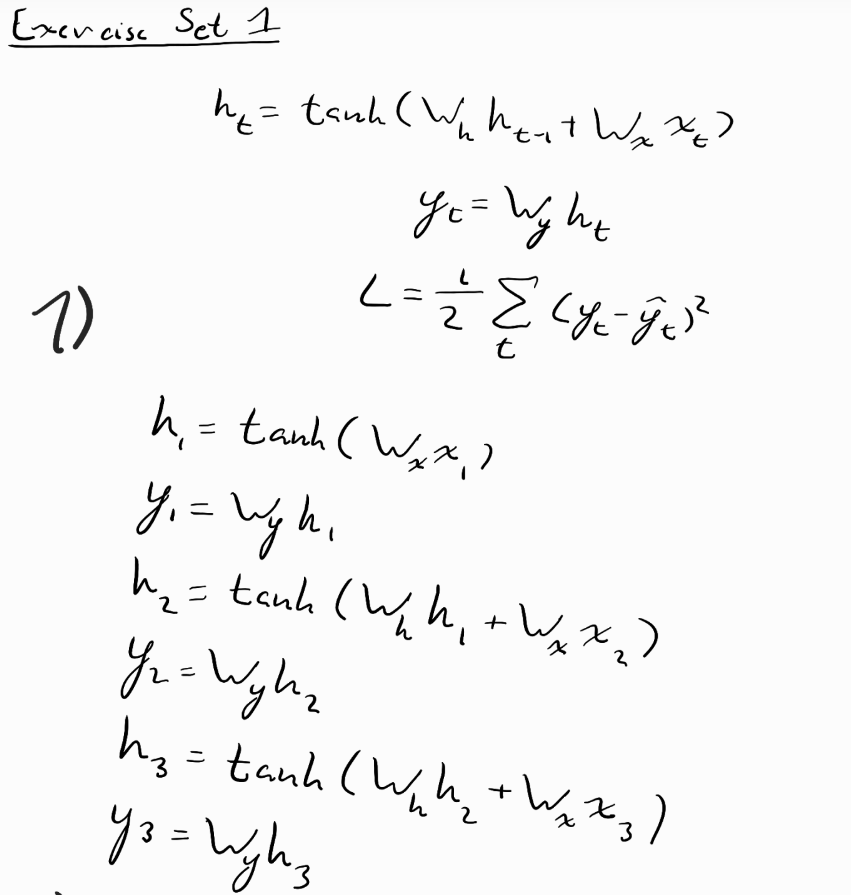

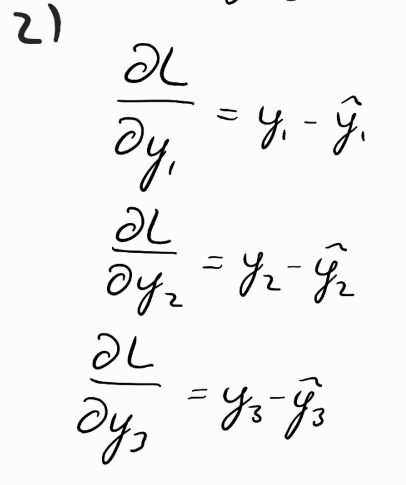

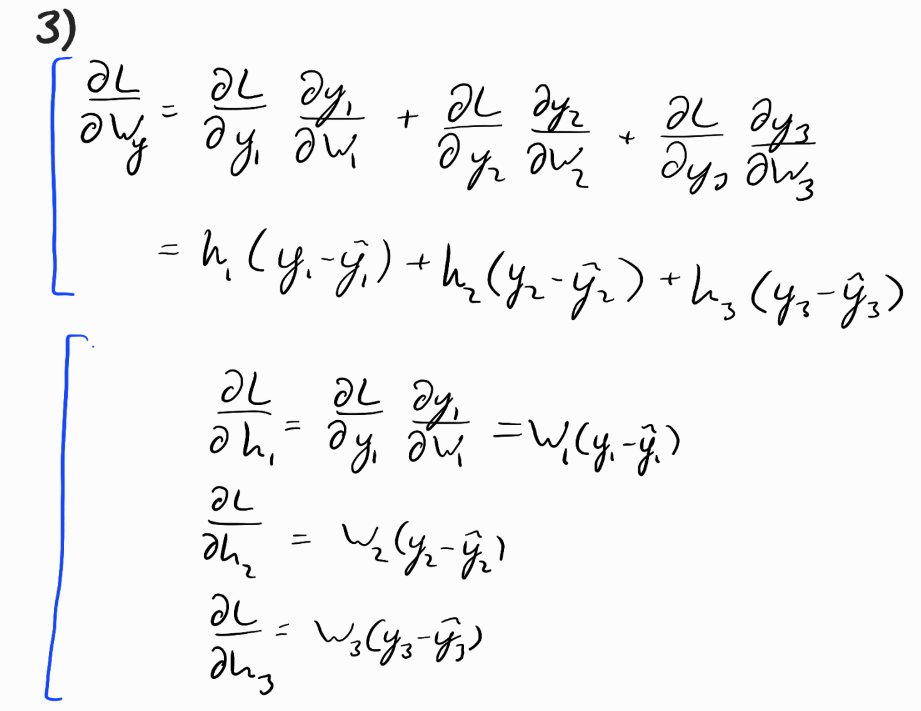

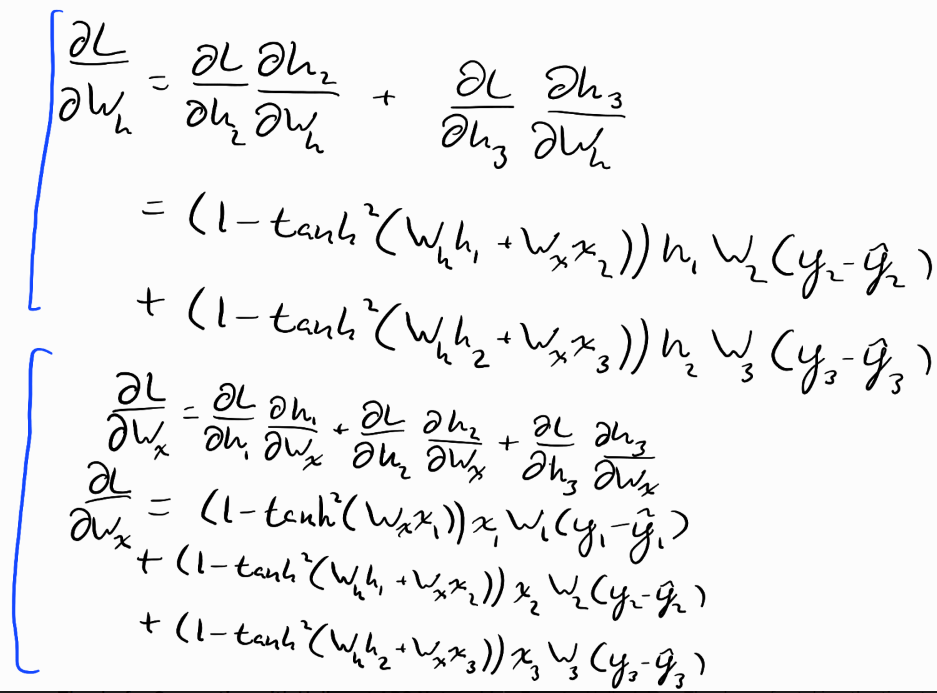

<h3> Exercise Set 2

In [3]:
# Exercise Set 2 (a)
url='https://raw.githubusercontent.com/aims-umich/ners590data/main/nrta.csv'
data = pd.read_csv(url)
print(data.head(5))

t = data.values[0,1:401]
print("t has len", len(t))
data = data.drop(0, axis=0)
data.shape

  label    t1    t2    t3    t4    t5    t6    t7     t8     t9  ...     t391  \
0     0  0.25  0.75  1.25  1.75  2.25  2.75  3.25  3.750  4.250  ...  195.250   
1    Ag  0.00  0.00  0.00  0.00  0.00  0.00  6.00  0.857  0.818  ...    0.828   
2    Ag  0.00  0.00  0.00  0.00  0.00  0.00  1.00  1.000  0.900  ...    0.965   
3    Ag  0.00  0.00  0.00  0.00  1.00  0.00  2.50  2.000  0.692  ...    1.011   
4    Ag  0.00  0.00  0.00  0.00  0.00  0.00  1.00  1.600  1.333  ...    0.930   

      t392     t393     t394     t395     t396     t397     t398     t399  \
0  195.750  196.250  196.750  197.250  197.750  198.250  198.750  199.250   
1    1.000    1.197    1.125    0.908    1.014    0.986    1.191    0.950   
2    1.198    0.911    0.860    0.900    1.024    1.233    0.879    1.120   
3    1.000    1.174    0.747    0.833    0.902    1.099    1.305    0.776   
4    0.709    1.026    0.929    1.366    1.029    1.095    1.030    0.914   

      t400  
0  199.750  
1    1.216  
2    0.929 

(10000, 401)

In [3]:
# Exercise Set 2 (b)
data = data.sample(frac=1).reset_index(drop=True)

Yraw = data.loc[:,'label']
Xraw = data.iloc[:,1:]

In [4]:
# Exercise Set 2 (c)
Y = pd.get_dummies(Yraw)

In [5]:
# Exercise Set 2 (d)
X = np.reshape(Xraw, (10000,400,1))

In [6]:
# Exercise Set 2 (e)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y)

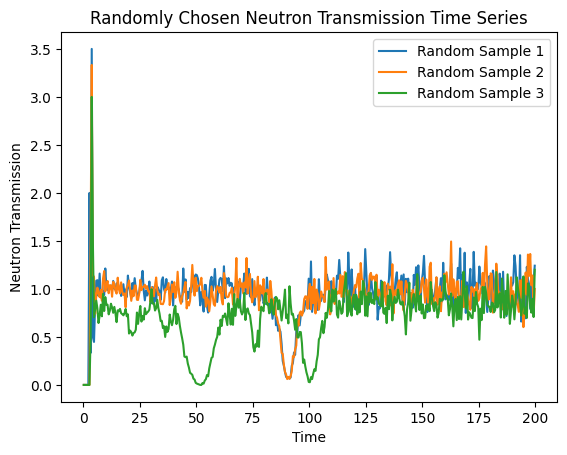

In [10]:
# Exercise Set 2 (f)
x = []
legend = ['Random Sample 1', 'Random Sample 2', 'Random Sample 3']
for i in range(3):
    x.append(Xtrain[np.random.randint(Xtrain.shape[0]),:,0])
plt.plot(t, np.column_stack(x), label=legend)
plt.xlabel('Time')
plt.ylabel('Neutron Transmission')
plt.title('Randomly Chosen Neutron Transmission Time Series')
plt.legend()
plt.show()

<h2> Exercise Set 3

In [94]:
# Exercise Set 3 (a)
  # node per layer, Y.shape[1] is number of categories
n_nodes=[100,50,32,Y.shape[1]]
lstm = Sequential()

lstm.add(Input(shape=Xtrain.shape[1:]))
lstm.add(LSTM(n_nodes[0], kernel_initializer = 'normal', recurrent_regularizer=L1L2(0.01,0.01), return_sequences=True))
lstm.add(LSTM(n_nodes[1], kernel_initializer = 'normal', recurrent_regularizer=L1L2(0.01,0.01), return_sequences=False))
lstm.add(Dense(n_nodes[2], activation='relu'))
lstm.add(Dense(n_nodes[3], activation='softmax'))
lstm.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_13 (LSTM)                  │ (None, 400, 100)       │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 72,764 (284.23 KB)

 Trainable params: 72,764 (284.23 KB)

 Non-trainable params: 0 (0.00 B)

In [95]:
# Exercise Set 3 (b)
gru = Sequential()

gru.add(Input(shape=Xtrain.shape[1:]))
gru.add(GRU(n_nodes[0], kernel_initializer = 'normal', recurrent_regularizer=L1L2(0.01,0.01), return_sequences=True))
gru.add(GRU(n_nodes[1], kernel_initializer = 'normal', recurrent_regularizer=L1L2(0.01,0.01), return_sequences=False))
gru.add(Dense(n_nodes[2], activation='relu'))
gru.add(Dense(n_nodes[3], activation='softmax'))
gru.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 400, 100)       │        30,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 50)             │        22,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,464 (216.66 KB)

 Trainable params: 55,464 (216.66 KB)

 Non-trainable params: 0 (0.00 B)

In [98]:
# Exercise Set 3 (c)
bilstm = Sequential()

bilstm.add(Input(shape=Xtrain.shape[1:]))
bilstm.add(Bidirectional(LSTM(n_nodes[0], kernel_initializer = 'normal', recurrent_regularizer=L1L2(0.01,0.01), return_sequences=True)))
bilstm.add(Bidirectional(LSTM(n_nodes[1], kernel_initializer = 'normal', recurrent_regularizer=L1L2(0.01,0.01), return_sequences=False)))
bilstm.add(Dense(n_nodes[2], activation='relu'))
bilstm.add(Dense(n_nodes[3], activation='softmax'))
bilstm.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 400, 200)       │        81,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 100)            │       100,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         3,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 185,364 (724.08 KB)

 Trainable params: 185,364 (724.08 KB)

 Non-trainable params: 0 (0.00 B)

In [107]:
# Exercise Set 3 (d)
lstm.compile(loss='categorical_crossentropy', optimizer=Adam(6e-4), metrics=['accuracy'])
gru.compile(loss='categorical_crossentropy', optimizer=Adam(6e-4), metrics=['accuracy'])
bilstm.compile(loss='categorical_crossentropy', optimizer=Adam(6e-4), metrics=['accuracy'])

In [108]:
# Exercise Set 3 (e)
lstm_checkpoint = ModelCheckpoint('lstm_best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
gru_checkpoint = ModelCheckpoint('gru_best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')
bilstm_checkpoint = ModelCheckpoint('bilstm_best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')

In [109]:
# Exercise Set 3 (f)
lstm_history = lstm.fit(Xtrain, Ytrain, epochs=15, batch_size=64, validation_split = 0.15, callbacks=lstm_checkpoint, verbose=True)
gru_history = gru.fit(Xtrain, Ytrain, epochs=15, batch_size=64, validation_split = 0.15, callbacks=gru_checkpoint, verbose=True)
bilstm_history = bilstm.fit(Xtrain, Ytrain, epochs=15, batch_size=64, validation_split = 0.15, callbacks=bilstm_checkpoint, verbose=True)

Epoch 1/15


2024-10-16 16:30:31.006617: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2589 - loss: 18.0916
Epoch 1: val_accuracy improved from -inf to 0.27200, saving model to lstm_best_model.keras
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.2590 - loss: 18.0427 - val_accuracy: 0.2720 - val_loss: 5.6050
Epoch 2/15
 99/100 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3693 - loss: 4.1213
Epoch 2: val_accuracy improved from 0.27200 to 0.37867, saving model to lstm_best_model.keras
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.3695 - loss: 4.1030 - val_accuracy: 0.3787 - val_loss: 2.0528
Epoch 3/15
 99/100 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5179 - loss: 1.7273
Epoch 3: val_accuracy improved from 0.37867 to 0.50044, saving model to lstm_best_model.keras
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.5181 - loss: 1.7233 - val_accuracy: 0.5004 - val_loss: 1.4575
Epoch 4/15
 99/100 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5438 - loss: 1.2847
Epoch 4: val_accuracy impro

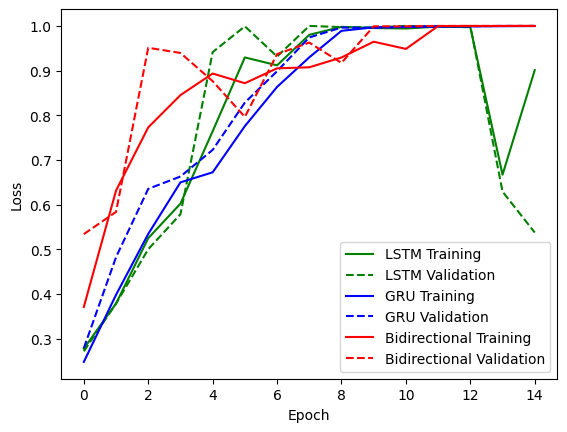

In [110]:
# Exercise Set 3 (g)
plt.figure()

train_err = lstm_history.history['accuracy']
val_err = lstm_history.history['val_accuracy']
plt.plot(train_err, label='LSTM Training', color='g')
plt.plot(val_err, label='LSTM Validation', color='g', linestyle='dashed')

train_err = gru_history.history['accuracy']
val_err = gru_history.history['val_accuracy']
plt.plot(train_err, label='GRU Training', color='b')
plt.plot(val_err, label='GRU Validation', color='b', linestyle='dashed')

train_err = bilstm_history.history['accuracy']
val_err = bilstm_history.history['val_accuracy']
plt.plot(train_err, label='Bidirectional Training', color='r')
plt.plot(val_err, label='Bidirectional Validation', color='r', linestyle='dashed')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

<h2> Exercise Set 4

In [7]:
lstm_best = load_model('lstm_best_model.keras')
gru_best = load_model('gru_best_model.keras')
bilstm_best = load_model('bilstm_best_model.keras')

2024-10-17 10:37:34.809185: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14784 MB memory:  -> device: 0, name: Tesla V100-PCIE-16GB, pci bus id: 0000:3b:00.0, compute capability: 7.0


In [8]:
# Exercise Set 4 (a)
lstm_metrics = lstm_best.evaluate(Xtest, Ytest)
gru_metrics = gru_best.evaluate(Xtest, Ytest)
bilstm_metrics = bilstm_best.evaluate(Xtest, Ytest)
metrics_df = pd.DataFrame(([lstm_metrics, gru_metrics, bilstm_metrics]), columns=['loss', 'accuracy'], index=['LSTM', 'GRU', 'Bidirectional'])
print(metrics_df)


 5/79 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.1766  

2024-10-17 10:37:37.546277: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9992 - loss: 0.1745
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9972 - loss: 0.0751
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 1.0000 - loss: 0.1717
                   loss  accuracy
LSTM           0.174930    0.9988
GRU            0.074404    0.9984
Bidirectional  0.171197    1.0000


In [29]:
# Exercise Set 4 (b)

# Get predictions and decode
Ypred = gru_best.predict(Xtest)
Ypred = Ypred>=0.5
Y_cf_pred = tf.argmax(Ypred, axis=1)
Y_cf_true = tf.argmax(Ytest.values, axis=1)

# Get accuracy
acc = []
for i in range(4):
    acc.append(accuracy_score(Ytest.values[:,i], Ypred[:,i]))

# Classification Report
cr = classification_report(Y_cf_true, Y_cf_pred, output_dict=True)

# Add Labels and load into dataframe
for i in range(4):
    cr[Ytest.columns[i]] = cr.pop(str(i))
    
# Delete Unneccesary Components
del cr['macro avg']
del cr['weighted avg']
del cr['accuracy']
cr_df = pd.DataFrame(cr)
cr_df = cr_df.drop('support')

# Add in accuracy and display
cr_df.loc['accuracy'] = acc
print(cr_df)

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
                 Ag   In         U         W
precision  0.998464  1.0  0.996840  0.998430
recall     1.000000  1.0  0.998418  0.995305
f1-score   0.999231  1.0  0.997628  0.996865
accuracy   1.000000  1.0  0.998800  0.998400


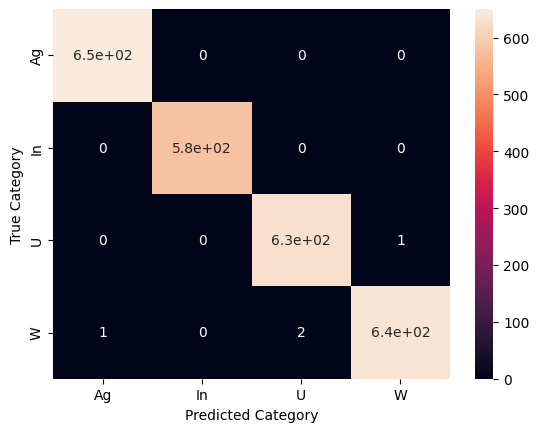

In [37]:
# Exercise Set 4 (c)
cm = confusion_matrix(Y_cf_true, Y_cf_pred)
cm_df = pd.DataFrame(cm, index=Ytest.columns, columns=Ytest.columns)

ax = plt.axes()
sns.heatmap(cm_df, annot=True)
ax.set_ylabel('True Category')
ax.set_xlabel('Predicted Category')
plt.show()

In [51]:
# Exercise Set 4 (d)

# ----------------------------------
# ----- Changed to Copied Code -----
# ----------------------------------
# Edited test_model to take a model argument
# Edited test_model to operate on Ytest.values instead of Ytest (which is still a dataframe for me)
# Edited make_plots to take a model argument

#-----------------------------------------
#Quick Model Testing
#-----------------------------------------
def test_model(n, model):
    """
    n: number of samples (time series curves to check randomly in the internal test set)
    """
    print("{} || {}".format("True", "Predicted"))
    print(60 * "=")
    for i in range(n):
        i = np.random.randint(0,Xtest.shape[0]) # choose a random number between 0 and len(X_te)
        p = np.argmax(model.predict(np.array([Xtest[i]]))[0]) #get the predictions as categorial variables of highest probability
        true = np.argmax(Ytest.values[i], -1)
        print("{} || {} (Test sample number {} of {})".format(elements[true], elements[p], i, Xtest.shape[0]))

    print(60 * "=")

#-----------------------------------------
#Model Deployment (Additional Testing)
#-------------------------------------------
def make_plots(X, Y, model, first_bin=0):
    """
    X: input data
    Y: labels
    first_bin: the first time step to include in plotting 
              (for scaling if the transmission values of the first few bins are very uncertain)
    """
    print("{} || {}".format("True", "Predicted"))
    print(60 * "=")
    for i in range(X.shape[0]):
        plt.figure()
        #i = np.random.randint(0,X.shape[0]) # choose a random number between 0 and len(X_te)
        p = np.argmax(model.predict(np.array([Xtest[i]]))[0]) #get the predictions as categorial variables of highest probability
        true = np.argmax(Y[i], -1)
        print("{} || {} (External Test sample number {} of {})".format(elements[true], elements[p], i+1, X.shape[0]))
        plt.title("{} (True) || {} (Predicted) (Sample number {} of {})".format(elements[true], elements[p], i+1, X.shape[0]))
        if (p==true):
            plt.plot(t[first_bin:],X[i,first_bin:], c=colors[p])
            plt.legend(['CORRECT Prediction ({})'.format(elements[p])])
        
        else:
            plt.plot(t[first_bin:],X[i,first_bin:], c='k')
            plt.legend(['WRONG Prediction'])
        plt.show()
    
    print(60 * "=")

In [45]:
test_model(20, gru_best)

True || Predicted
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
U || U (Test sample number 2177 of 2500)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
In || In (Test sample number 995 of 2500)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
U || U (Test sample number 1458 of 2500)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
In || In (Test sample number 2241 of 2500)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
W || W (Test sample number 1328 of 2500)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Ag || Ag (Test sample number 595 of 2500)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
In || In (Test sample number 848 of 2500)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
U || U (Test sample number 753 of 2500)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
W || W (Test sample number 1544 of 2500)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
U || U (Test sample number 1303 of 2500)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Ag || Ag (Test sample number 1849 of 2500)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
U || U (Test sample number 1246 of 2500)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

20 / 20 model predictions are correct

True || Predicted
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
U || U (External Test sample number 1 of 20)


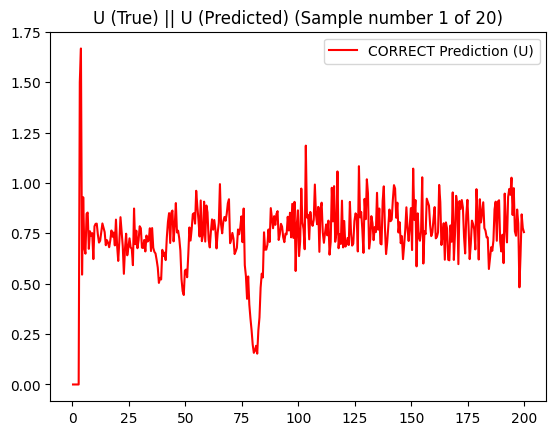

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
W || W (External Test sample number 2 of 20)


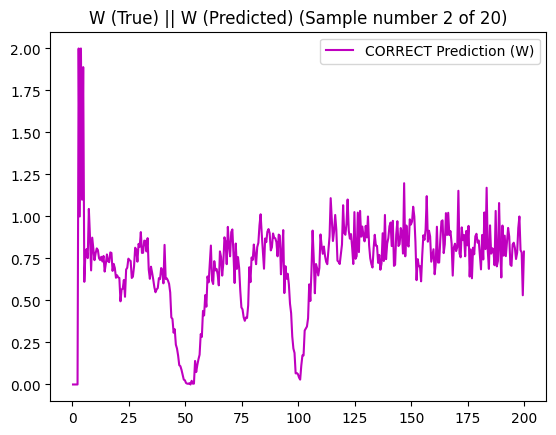

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
In || In (External Test sample number 3 of 20)


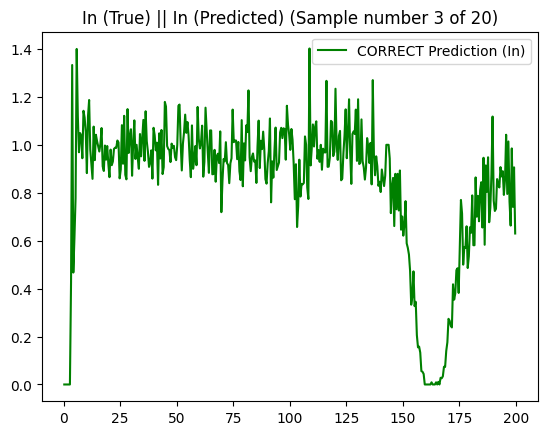

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
U || U (External Test sample number 4 of 20)


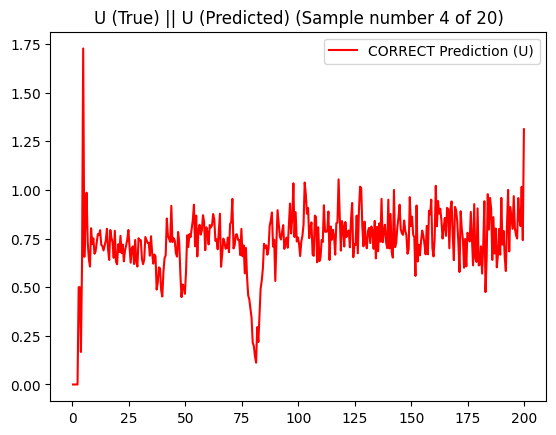

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
U || U (External Test sample number 5 of 20)


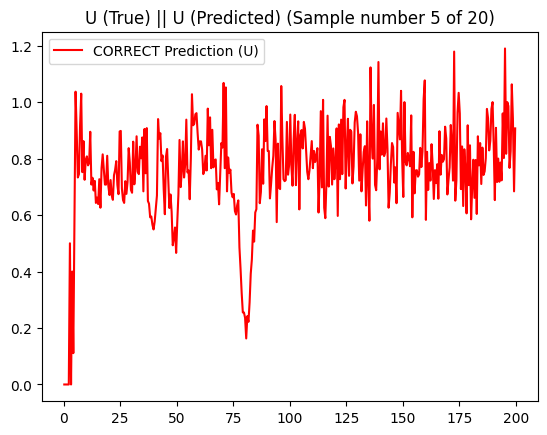

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
U || U (External Test sample number 6 of 20)


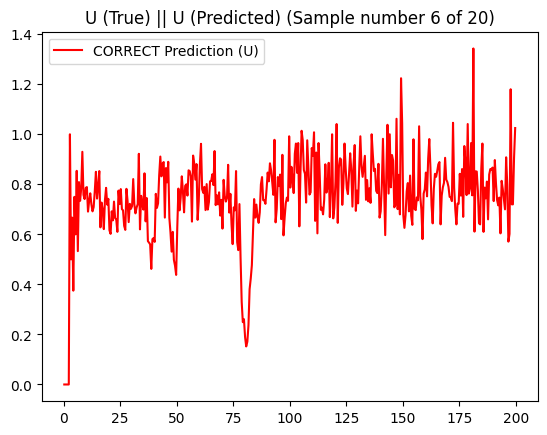

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
W || W (External Test sample number 7 of 20)


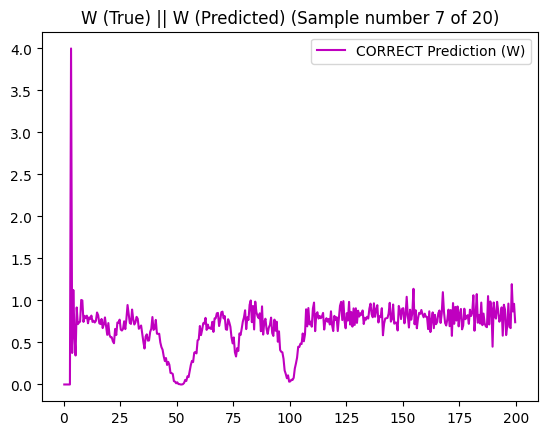

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Ag || Ag (External Test sample number 8 of 20)


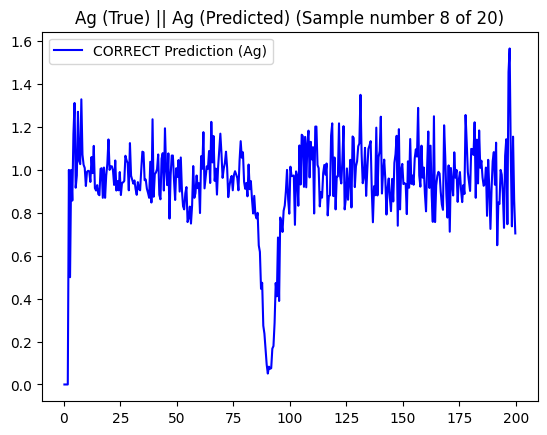

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
W || U (External Test sample number 9 of 20)


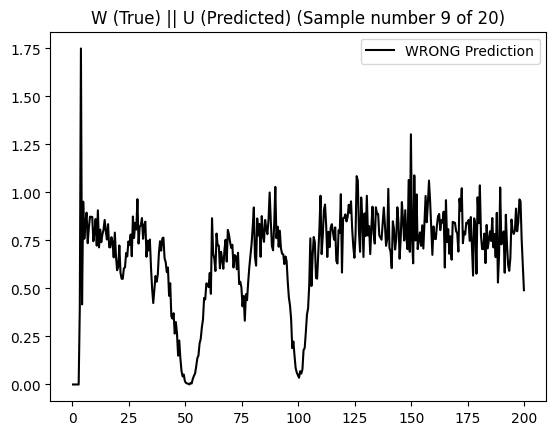

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Ag || Ag (External Test sample number 10 of 20)


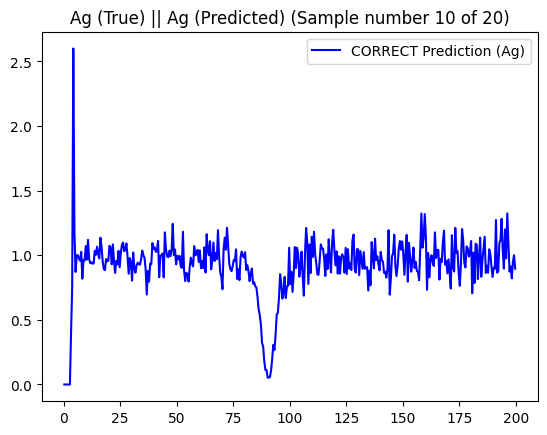

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
W || W (External Test sample number 11 of 20)


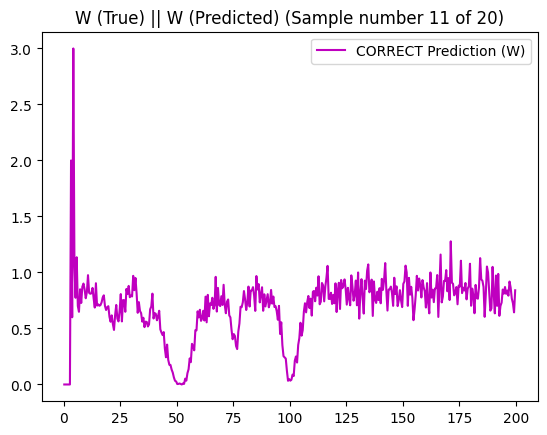

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
In || In (External Test sample number 12 of 20)


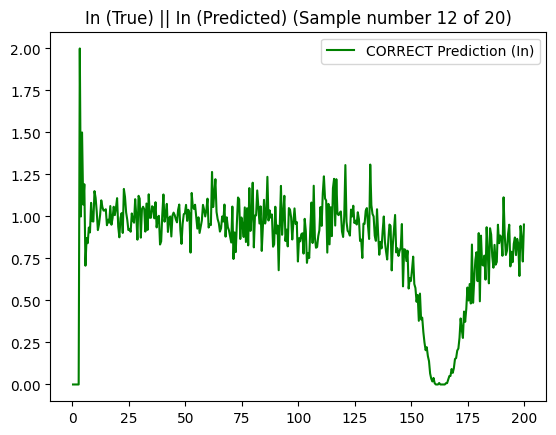

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Ag || Ag (External Test sample number 13 of 20)


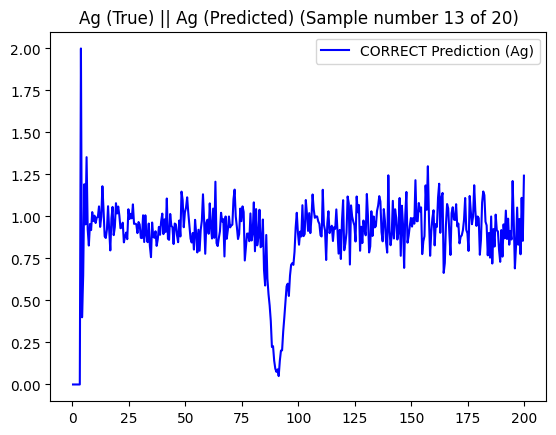

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Ag || Ag (External Test sample number 14 of 20)


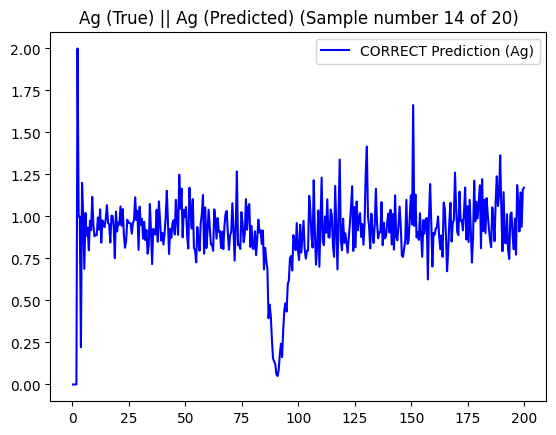

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
In || In (External Test sample number 15 of 20)


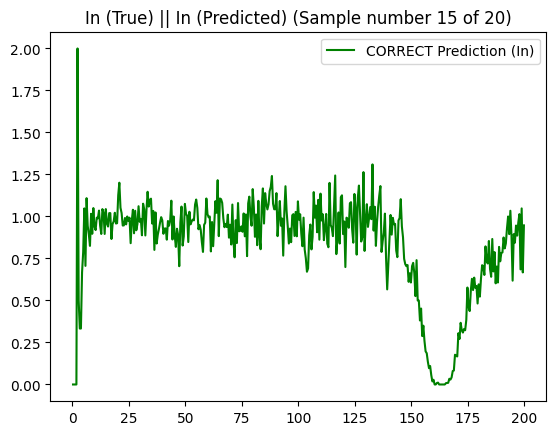

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
W || W (External Test sample number 16 of 20)


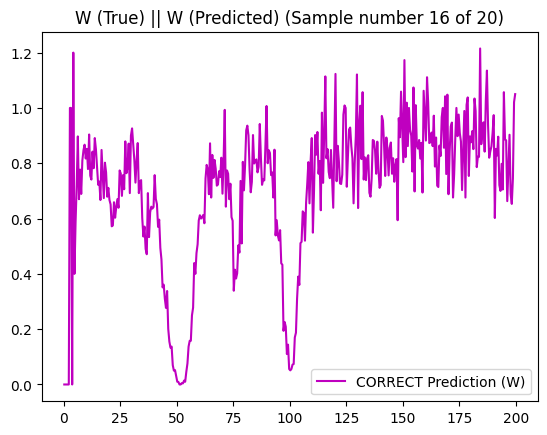

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Ag || Ag (External Test sample number 17 of 20)


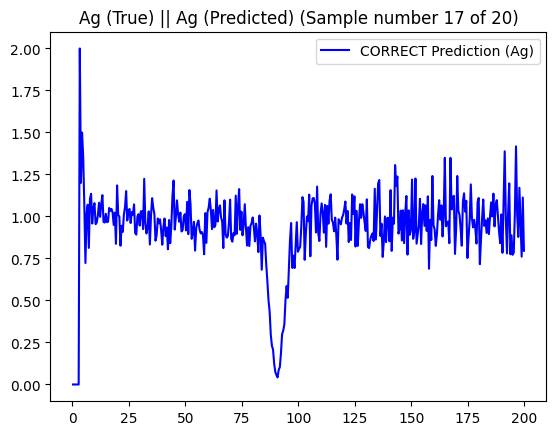

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Ag || Ag (External Test sample number 18 of 20)


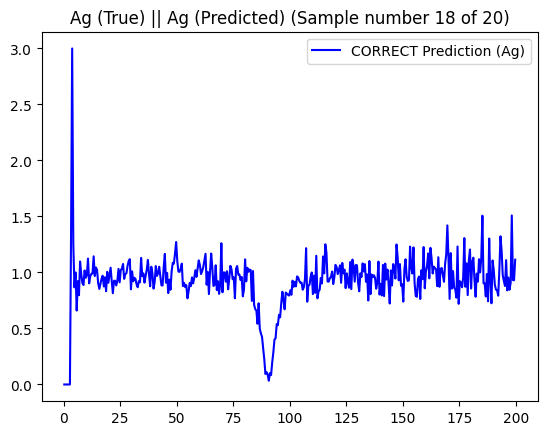

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Ag || Ag (External Test sample number 19 of 20)


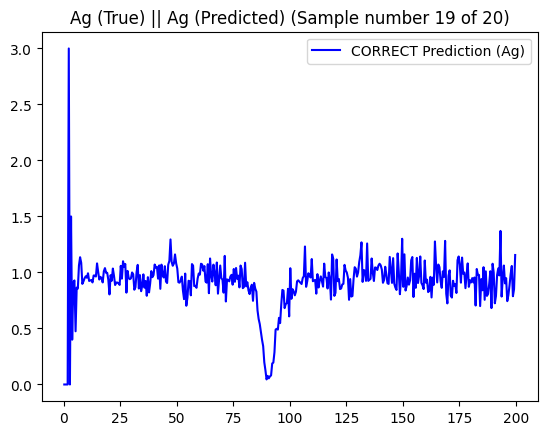

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Ag || Ag (External Test sample number 20 of 20)


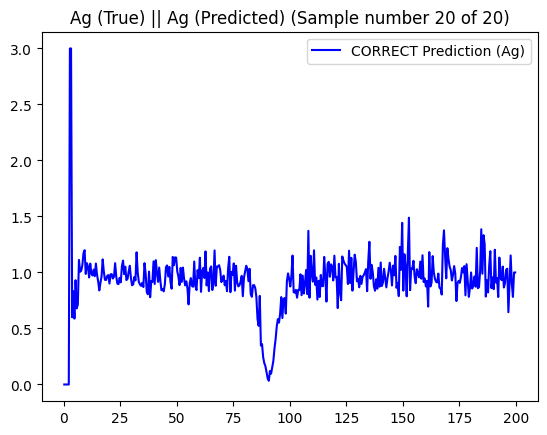

In [49]:
make_plots(Xtest[0:20,:,:], Ytest.values[0:20,:], gru_best, first_bin=0)

19/20 predictions are correct

DISCUSSION HERE


<h3> Exercise Set 5

In [96]:
from sklearn.metrics import mean_absolute_error

# Generating Xtrain and Xtest, a sin function with a random phase and added gaussian noise
def synthetic_data_gen(t):
    t = t + np.random.uniform(0, np.pi)
    return np.sin(t) + np.random.normal(0,0.2, t.shape)

# Anomolous Data Function
def anomolous_data_gen(t):
    return np.sin(t) + np.random.normal(0,2, t.shape)

row = np.linspace(0, 2 * np.pi, 50)
T = np.tile(row, (1000,1))
np.random.seed(10000)
xtrain = synthetic_data_gen(T)
np.random.seed(20000)
xtest = synthetic_data_gen(T[0:200])
np.random.seed(30000)
atest = anomolous_data_gen(T[0:200])

xtrain = xtrain.reshape((1000, 50, 1))
xtest = xtest.reshape((200, 50, 1))
atest = atest.reshape((200, 50, 1))

In [85]:
from keras.models import Model
from keras.layers import RepeatVector, TimeDistributed

# Define the encoder
input_range = Input(shape=xtrain.shape[1:])
x = GRU(50, kernel_initializer = 'normal', recurrent_regularizer=L1L2(0.01,0.01), return_sequences=True)(input_range)
x = GRU(25, kernel_initializer = 'normal', recurrent_regularizer=L1L2(0.01,0.01), return_sequences=False)(x)
encoded = RepeatVector(50)(x) # Bottleneck

encoder = Model(input_range, encoded, name="encoder")

# Define the decoder
encoded_input = Input(shape=(50, 25)) # The shape from the encoder
x = GRU(25, kernel_initializer = 'normal', recurrent_regularizer=L1L2(0.01,0.01), return_sequences=True)(encoded_input)
x = GRU(50, kernel_initializer = 'normal', recurrent_regularizer=L1L2(0.01,0.01), return_sequences=True)(x)
decoded = TimeDistributed(Dense(1))(x)

decoder = Model(encoded_input, decoded, name="decoder")

# Autoencoder model: connects the encoder and the decoder
autoencoder_output = decoder(encoder(input_range))
autoencoder = Model(input_range, autoencoder_output, name="autoencoder")
autoencoder.summary()

autoencoder.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])
ae_history = autoencoder.fit(xtrain, xtrain, epochs=10, batch_size=2, validation_split=0.2)

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_40 (InputLayer)     │ (None, 50, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 50, 25)         │        13,725 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 50, 1)          │        15,501 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,226 (114.16 KB)

 Trainable params: 29,226 (114.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - loss: 6.1170 - mean_absolute_error: 0.5787 - val_loss: 0.5552 - val_mean_absolute_error: 0.5286
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 0.5572 - mean_absolute_error: 0.5325 - val_loss: 0.5499 - val_mean_absolute_error: 0.5274
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.5506 - mean_absolute_error: 0.5274 - val_loss: 0.5536 - val_mean_absolute_error: 0.5304
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.5522 - mean_absolute_error: 0.5292 - val_loss: 0.5480 - val_mean_absolute_error: 0.5250
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.5500 - mean_absolute_error: 0.5266 - val_loss: 0.5474 - val_mean_absolute_error: 0.5254
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.5472 - mean_absolute_error: 0.5244 - val_loss: 0.4775 - val_mean_absolute_error: 0.4539
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.3715 - mean_absolute_error: 0.

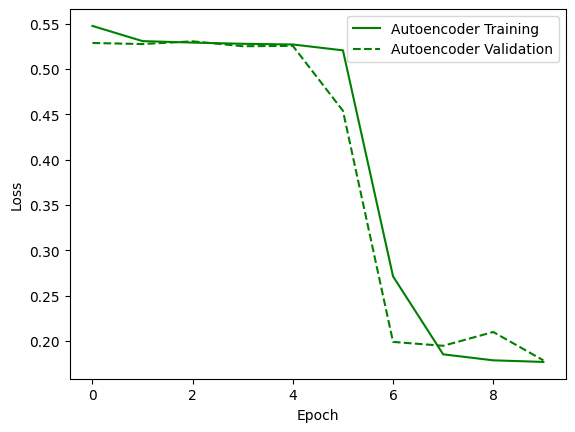

In [87]:
train_err = ae_history.history['mean_absolute_error']
val_err = ae_history.history['val_mean_absolute_error']
plt.plot(train_err, label='Autoencoder Training', color='g')
plt.plot(val_err, label='Autoencoder Validation', color='g', linestyle='dashed')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [88]:
# Reconstruction loss for test data
encoded_signal = encoder.predict(xtest)
xpred = decoder.predict(encoded_signal)
print("Reconstruction loss is", mean_absolute_error(xtest[:,:,0], xpred[:,:,0]))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step
Reconstruction loss is 0.31288852632442127


In [89]:
# Reconstructio loss for anomalous data
encoded_signal = encoder.predict(atest)
apred = decoder.predict(encoded_signal)
print("Reconstruction loss is", mean_absolute_error(atest[:,:,0], apred[:,:,0]))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Reconstruction loss is 2.335156879160411


Anomolus data had a much higher reconstruction loss

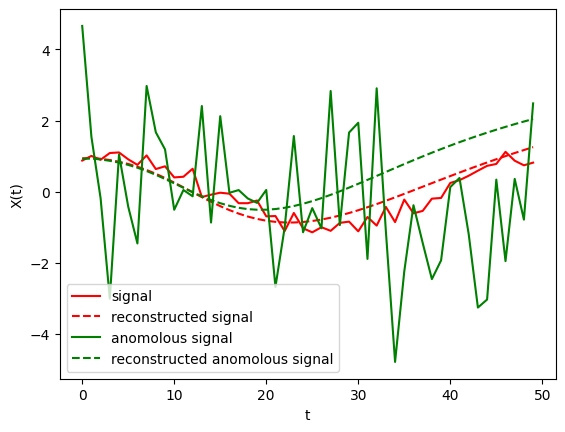

In [95]:
random_choice = np.random.randint(0,200)
plt.plot(xtest[random_choice,:,0], color='r', label='signal')
plt.plot(xpred[random_choice,:,0], color='r', linestyle='dashed', label='reconstructed signal')
random_choice = np.random.randint(0,200)
plt.plot(atest[random_choice,:,0], color='g', label='anomolous signal')
plt.plot(apred[random_choice,:,0], color='g', linestyle='dashed', label='reconstructed anomolous signal')
plt.xlabel('t')
plt.ylabel('X(t)')
plt.legend()
plt.show()

The autoencoder seems to predict the underlying simple sin function without the noise. This took several tries to create, as intially I had too much information passing through the bottleneck and the autoencoder was reproducing all the noise for every signal. In experiments, this could be used to look for data that is significantly different from "normal" data, like looking for exoplanet transits or neutrino signals above the background noise level.